<a href="https://colab.research.google.com/github/Adithya-030924/Adithya-030924/blob/main/pca1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised models**
```



# **Dataset 1**

# *Data extraction *

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahistapatel96/wholesale-customer-datacsv")

print("Path to dataset files:", path)

100%|██████████| 6.85k/6.85k [00:00<00:00, 8.96MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sahistapatel96/wholesale-customer-datacsv/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/sahistapatel96/wholesale-customer-datacsv/versions/1'

In [ ]:
import shutil

shutil.copytree(path,'content')

'content'

# *Data preprocessing*

In [ ]:
import pandas  as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('content/Wholesale customers data.csv')

In [ ]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
d1=data.drop_duplicates()

In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
data=data.iloc[:,2:]
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [ ]:
data.keys()


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [ ]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
data.isna().sum()

,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
data1=data.copy()

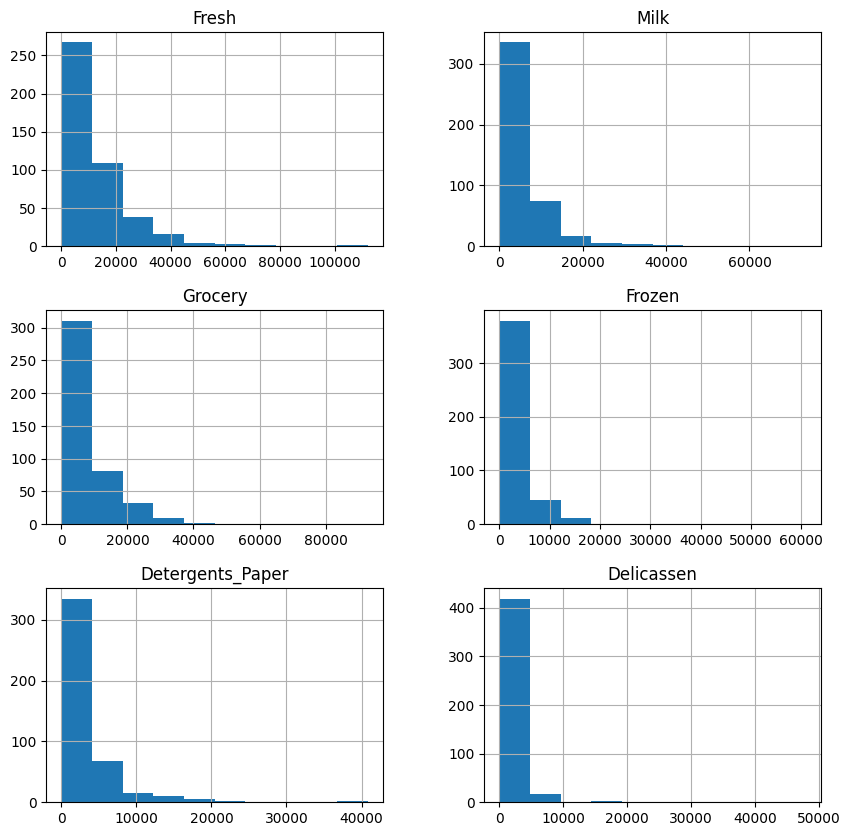

In [ ]:

data.hist(column=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'],figsize=(10,10))
plt.show()

In [ ]:
sd=StandardScaler()
d1=sd.fit_transform(data)
d1

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [ ]:
d1.shape

(440, 6)

In [ ]:
pca=PCA(n_components=3)
pca.fit(d1)

PCA(n_components=3)

In [ ]:
d1= pca.transform(d1)
print(d1)

[[ 0.19329055 -0.30509996  0.14087845]
 [ 0.4344199  -0.32841262 -0.31900662]
 [ 0.81114323  0.8150957  -1.52341562]
 ...
 [ 3.46570362 -1.03983801  0.71316141]
 [-0.91802273 -0.03004659 -0.25840805]
 [-1.10513709 -0.86133787 -0.30515404]]


In [ ]:
d1.shape

(440, 3)

In [ ]:
ev = pca.explained_variance_
print('Eigen values', ev)

Eigen values [2.65099857 1.70646229 0.74175057]


In [ ]:
evt= pca.components_
print('Eigen vectors\n',evt)

Eigen vectors
 [[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [ 0.81225657 -0.06038798  0.10838401 -0.17838615  0.13619225 -0.52390412]]


In [ ]:
ev=pca.explained_variance_ratio_
cv=np.cumsum(ev)
print(ev)
print(cv)

[0.44082893 0.283764   0.12334413]
[0.44082893 0.72459292 0.84793705]


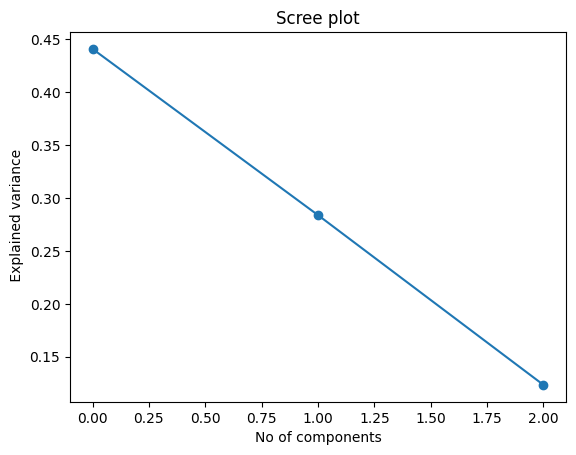

In [ ]:
plt.plot(pca.explained_variance_ratio_,marker='o')
plt.xlabel('No of components')
plt.ylabel(' Explained variance')
plt.title('Scree plot')
plt.show()

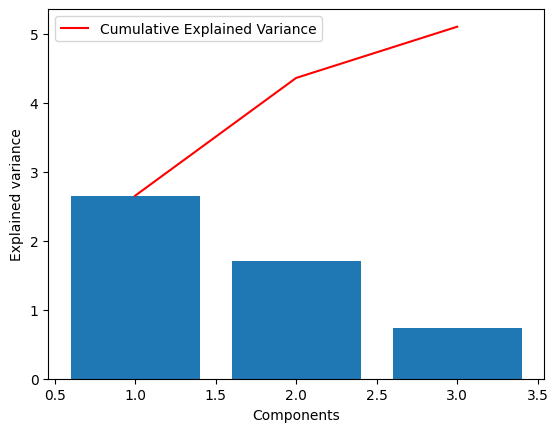

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

# **KMEANS**

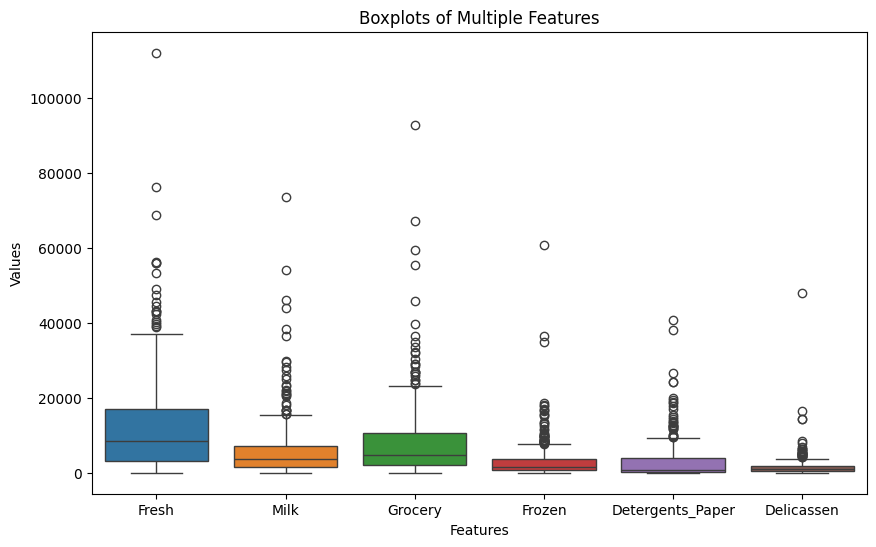

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1)
plt.title('Boxplots of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
np.random.seed(0)
data1= np.random.rand(100, 2)

In [ ]:
kmeans1=KMeans(n_clusters=3,random_state=0)
kmean=kmeans1.fit(data1)

In [ ]:
data1

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195],
       [0.6976312 , 0.06022547],
       [0.66676672, 0.67063787],
       [0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077],
       [0.57019677, 0.43860151],
       [0.98837384, 0.10204481],
       [0.20887676, 0.16130952],
       [0.65310833, 0.2532916 ],
       [0.46631077, 0.24442559],
       [0.

In [ ]:
centroids=kmeans1.cluster_centers_
centroids

array([[0.35217863, 0.78488734],
       [0.76167338, 0.40765364],
       [0.27223715, 0.21097997]])

In [ ]:
y=kmeans1.fit_predict(data1)
y

array([0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2], dtype=int32)

In [ ]:
data1=pd.DataFrame(data1,columns=['A','B'])
data1['cluster']=y
data1.head()

,A,B,cluster
0,0.548814,0.715189,0
1,0.602763,0.544883,1
2,0.423655,0.645894,0
3,0.437587,0.891773,0
4,0.963663,0.383442,1


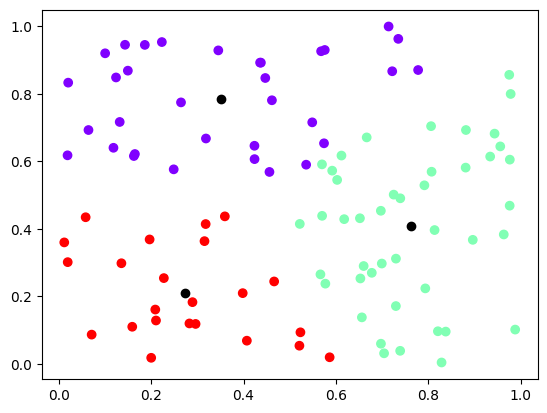

In [ ]:
plt.scatter(data1['A'],data1['B'],c=data1['cluster'],cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],color='black')
plt.show()

# 2 **dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("madhuraatmarambhagat/crop-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-recommendation-dataset


In [ ]:
import shutil

shutil.copytree(path,'content4')

FileExistsError: [Errno 17] File exists: 'content4'

In [ ]:
df2=pd.read_csv('/content/content4/Crop_recommendation.csv')

In [ ]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df2.keys()

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df2.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
df2.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


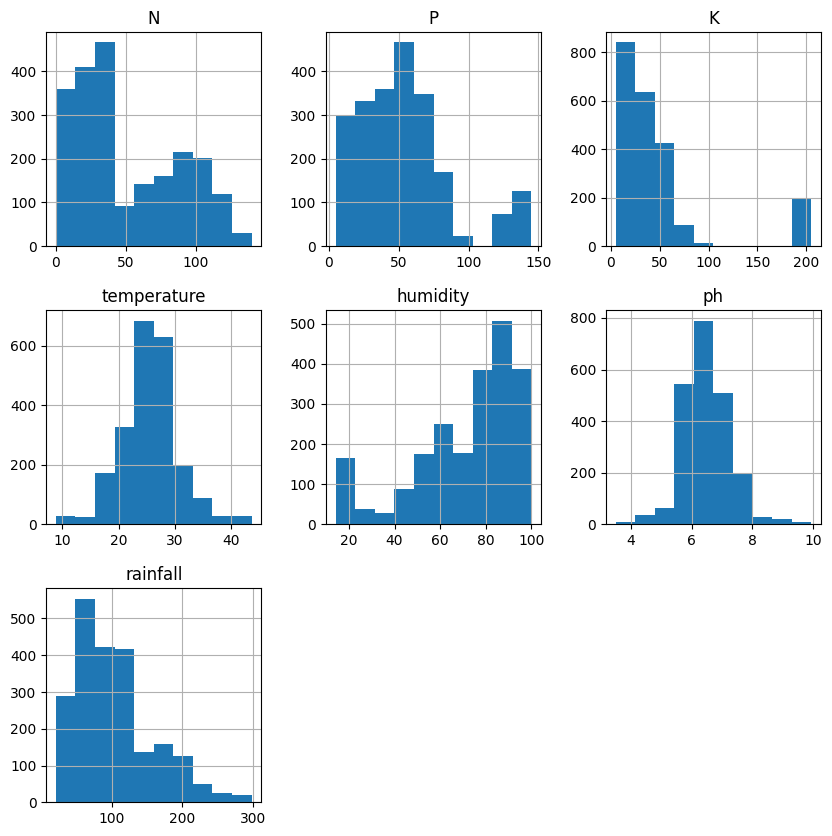

In [ ]:
df2.hist(column=['N','P','K','temperature','humidity','ph','rainfall','label'],figsize=(10,10))
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df2=pd.get_dummies(df2,columns=['label'])
df2.head()



,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df22=df2.copy()

In [ ]:
scaler=StandardScaler()
df2=scaler.fit_transform(df2)
df2

array([[ 1.0687974 , -0.34455075, -0.1016875 , ..., -0.21821789,
         4.58257569, -0.21821789],
       [ 0.93332887,  0.14061552, -0.14118477, ..., -0.21821789,
         4.58257569, -0.21821789],
       [ 0.25598625,  0.04964684, -0.08193887, ..., -0.21821789,
         4.58257569, -0.21821789],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.21821789,
        -0.21821789, -0.21821789],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.21821789,
        -0.21821789, -0.21821789],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.21821789,
        -0.21821789, -0.21821789]])

In [ ]:
pca2=PCA(n_components=3)
pca2.fit(df2)

PCA(n_components=3)

In [ ]:
x_d2= pca2.transform(df2)
print(x_d2)

[[-0.75141956  1.51614015  2.77281958]
 [-0.63836539  1.49136666  2.88175042]
 [-0.73356145  1.45382755  3.08376289]
 ...
 [-1.50291146  0.66994236  1.38321309]
 [-1.52865829  0.14495996  0.76483662]
 [-1.66774607  0.1913338   0.98794281]]


In [ ]:
ev = pca2.explained_variance_
print('Eigen values', ev)

Eigen values [2.94969552 2.29568464 1.99738032]


In [ ]:
evt= pca2.components_
print('Eigen vectors\n',evt)

Eigen vectors
 [[-0.23961345  0.52618319  0.51508679 -0.14769613 -0.04819786 -0.15291329
  -0.06082051  0.36339373  0.02043524 -0.02363618  0.09078625 -0.0757582
  -0.1149478  -0.10028726  0.36058491 -0.05705938  0.06221632  0.01990682
  -0.04255373 -0.04289562 -0.02635912 -0.03414124 -0.10299794 -0.09779778
  -0.03037708  0.02418948 -0.04064308 -0.05422421 -0.09783414]
 [ 0.2897046   0.01285878  0.22104543  0.17792213  0.5824708  -0.08428912
   0.20383763  0.17394738  0.13312713 -0.07369392 -0.31243941  0.11915077
   0.02508981  0.07486142  0.10709586  0.10617206 -0.30833656 -0.14821931
  -0.04159498 -0.11312129 -0.17054137 -0.0211308   0.13263747 -0.00286587
   0.16681585 -0.1127048   0.013601    0.15813848  0.09401109]
 [-0.08116777 -0.01495313 -0.06093977 -0.15634994 -0.13809175 -0.22105299
   0.63174637  0.01584049 -0.01882741 -0.14774819  0.00193911  0.20039659
   0.12382699 -0.11582272 -0.09912251  0.15319581  0.1854113  -0.14305833
  -0.0080634   0.03693185 -0.13113063 -0.17956

In [ ]:
ev=pca2.explained_variance_ratio_
cv=np.cumsum(ev)
print(ev)
print(cv)

[0.10166741 0.07912556 0.06884388]
[0.10166741 0.18079296 0.24963684]


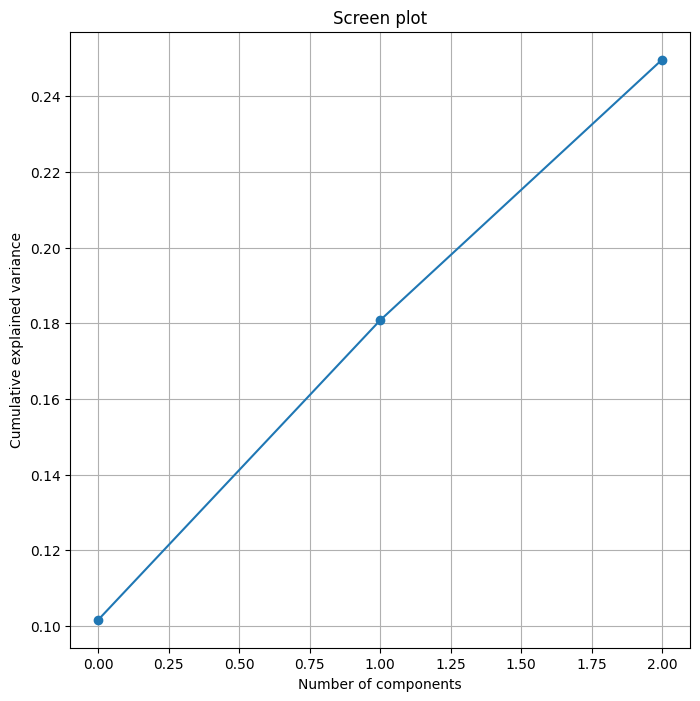

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(pca2.explained_variance_ratio_,marker='o')
plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

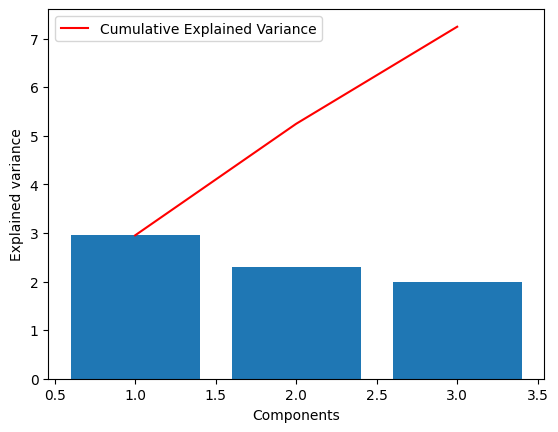

In [ ]:
plt.bar(range(1,len(pca2.explained_variance_ )+1),pca2.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca2.explained_variance_ )+1),
         np.cumsum(pca2.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

# **KMEANS**

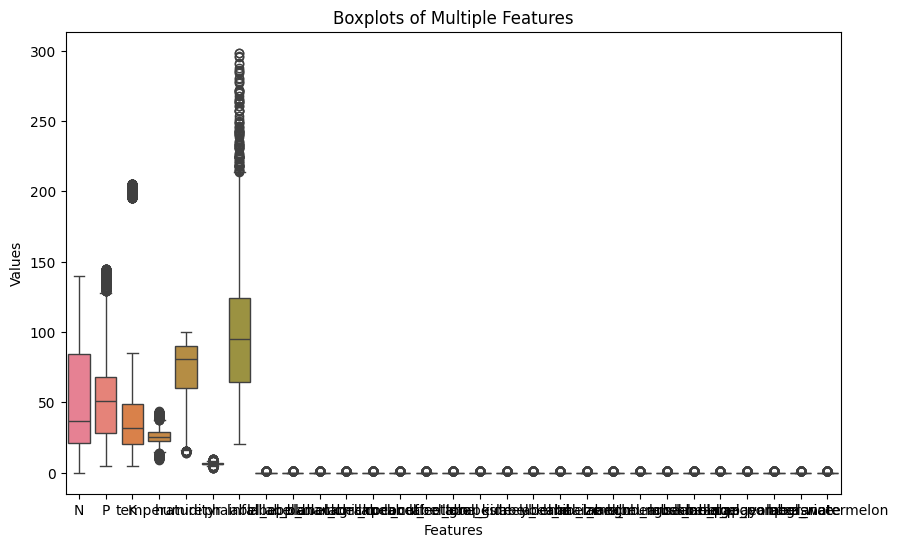

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df22)
plt.title('Boxplots of Multiple Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
np.random.seed(0)
df22= np.random.rand(100, 2)

In [ ]:
kmeans2=KMeans(n_clusters=3,random_state=0)
kmean=kmeans2.fit(df22)

In [ ]:
df22

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ],
       [0.3595079 , 0.43703195],
       [0.6976312 , 0.06022547],
       [0.66676672, 0.67063787],
       [0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077],
       [0.57019677, 0.43860151],
       [0.98837384, 0.10204481],
       [0.20887676, 0.16130952],
       [0.65310833, 0.2532916 ],
       [0.46631077, 0.24442559],
       [0.

In [ ]:
centroids=kmeans2.cluster_centers_
centroids

array([[0.35217863, 0.78488734],
       [0.76167338, 0.40765364],
       [0.27223715, 0.21097997]])

In [ ]:
y=kmeans2.fit_predict(df22)
y

array([0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2,
       0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2], dtype=int32)

In [ ]:
data2=pd.DataFrame(df22,columns=['A','B'])
data2['cluster']=y
data2.head()

,A,B,cluster
0,0.548814,0.715189,0
1,0.602763,0.544883,1
2,0.423655,0.645894,0
3,0.437587,0.891773,0
4,0.963663,0.383442,1


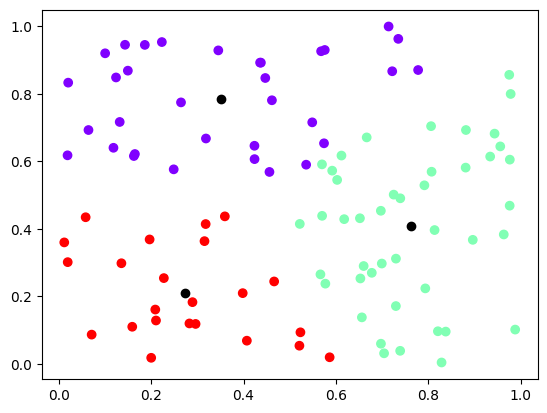

In [ ]:
plt.scatter(data2['A'],data2['B'],c=data2['cluster'],cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],color='black')
plt.show()